In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import scipy.io as sio

In [3]:
from bicme.tests.case_normal import CaseNormal
from bicme.samplers import MWGSampler
from bicme.samplers import RosenthalAdaptiveSampler
from bicme.proposals import RWMHProposal
from bicme.display import quick_display
from bicme.display import DisplayResults

In [4]:
mat1 = sio.loadmat('../../Tests/Data/NormData.mat')
data = np.array(mat1['data']).flatten()
np.random.seed(1)
cn = CaseNormal(data)

##### Run Rosenthal adaptive sampler with scaling during burn-in; proposal-  random-walk Metropoli-Hastings mixture.

In [14]:
X0 = [1, 12]
N = 10000 # samples required
M = 1000 # notify every #
lag = 50 # adjustment lag
# Initialise Proposer
proposer = RWMHProposal(cn.logPosterior, verbose=True)
# Initialise Sampler
sampler = RosenthalAdaptiveSampler(samples_draw=10000, 
                            notify_every=100, burnin_fraction=0.5, 
                            burnin_lag=5, model=cn.logPosterior,  
                            proposal=proposer.propose_block_mixture,
                            verbose=True) 
sampler.acceptance_limits = [0.1, 0.7]
sampler.scale = 0.01
# Sample
np.random.seed(2)
S = sampler.sample_block(X0)

Sampler initialised...
Iteration 5; Acceptance: 0.800000; Scale factor 1.010000: increased
Iteration 10; Acceptance: 0.800000; Scale factor 1.020100: increased
Iteration 15; Acceptance: 0.800000; Scale factor 1.030301: increased
Iteration 20; Acceptance: 0.600000; Scale factor 1.030301: not changed
Iteration 25; Acceptance: 0.600000; Scale factor 1.030301: not changed
Iteration 30; Acceptance: 0.400000; Scale factor 1.030301: not changed
Iteration 35; Acceptance: 0.800000; Scale factor 1.040604: increased
Iteration 40; Acceptance: 0.000000; Scale factor 1.030198: decreased
Iteration 45; Acceptance: 0.400000; Scale factor 1.030198: not changed
Iteration 50; Acceptance: 0.400000; Scale factor 1.030198: not changed
Iteration 55; Acceptance: 0.800000; Scale factor 1.040500: increased
Iteration 60; Acceptance: 0.000000; Scale factor 1.030095: decreased
Iteration 65; Acceptance: 0.200000; Scale factor 1.030095: not changed
Iteration 70; Acceptance: 0.000000; Scale factor 1.019794: decreased


C:\BICME\bicme\tests\case_normal.py:31: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(scipy.stats.norm.pdf(self.data, X[0], X[1])))
C:\BICME\bicme\tests\case_normal.py:35: RuntimeWarning: divide by zero encountered in log
  + np.log(scipy.stats.uniform.pdf(X[1], self.si_low, self.si_range)))


Iteration 755; Acceptance: 0.000000; Scale factor 0.710127: decreased
Iteration 760; Acceptance: 0.200000; Scale factor 0.710127: not changed
Iteration 765; Acceptance: 0.200000; Scale factor 0.710127: not changed
Iteration 770; Acceptance: 0.000000; Scale factor 0.703026: decreased
Iteration 775; Acceptance: 0.400000; Scale factor 0.703026: not changed
Iteration 780; Acceptance: 0.000000; Scale factor 0.695995: decreased
Iteration 785; Acceptance: 0.200000; Scale factor 0.695995: not changed
Iteration 790; Acceptance: 0.000000; Scale factor 0.689036: decreased
Iteration 795; Acceptance: 0.200000; Scale factor 0.689036: not changed
Iteration 800; Acceptance: 0.000000; Scale factor 0.682145: decreased
8.0 %
Iteration 805; Acceptance: 0.200000; Scale factor 0.682145: not changed
Iteration 810; Acceptance: 0.000000; Scale factor 0.675324: decreased
Iteration 815; Acceptance: 0.000000; Scale factor 0.668570: decreased
Iteration 820; Acceptance: 0.200000; Scale factor 0.668570: not changed


In [15]:
print('MEP index = ', S.MEP_index)
print('MEP = ', S.MEP)
print('MEP pars=', S.MEP_samples)

MEP index =  8280
MEP =  -1118.18393092
MEP pars= [-0.26228923  9.78398005]


In [16]:
#quick_display(S, burnin=N//2)

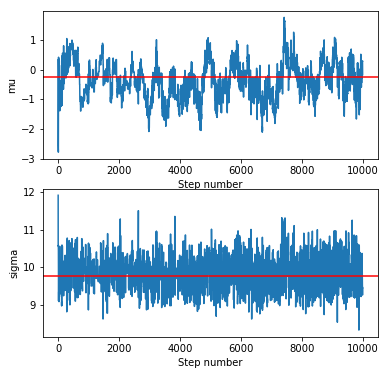

In [17]:
display = DisplayResults(S, burnin=S.N//2, names=['mu', 'sigma'])
#display.show_labels = False
display.chains()

In [18]:
#display.distributions()

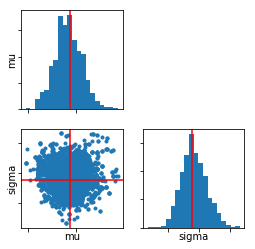

In [19]:
display.corner()

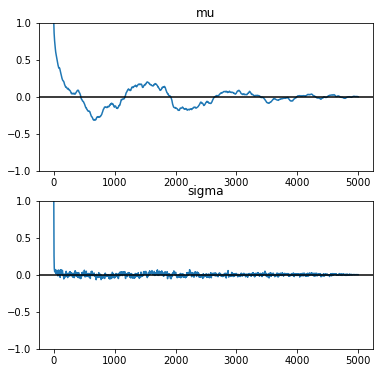

In [20]:
display.autocorrelations()

In [21]:
#display.normalised = True
#display.chains()

In [13]:
#display.distributions()